# 7.7 Applications to Polymers


In [729]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interactive

Model a polymer of length $N$ as chain on a rectangular lattice.

In [730]:
def walker2D(N = 100, # number of steps
             x0 = 0, # initial position
             y0 = 0, 
             a = 1, # step size
            ):
    
    xAccum = np.zeros(N+1)
    yAccum = np.zeros(N+1)
    
    x = x0
    y = y0
    for n in range(N+1):
        
        xAccum[n] = x
        yAccum[n] = y
        
        r = np.random.rand()
        if r < 0.25:
            x += a
        elif r < 0.50:
            x -= a
        elif r < 0.75:
            y += a
        else:
            y -= a
        
    return {'x': xAccum[-1],
            'y': yAccum[-1],
            'xAccum': xAccum,
            'yAccum': yAccum}

Each random walk is made up of $N$ steps.

In [732]:
walker2D(N=6)

{'x': 0.0,
 'y': 2.0,
 'xAccum': array([0., 1., 2., 1., 1., 0., 0.]),
 'yAccum': array([0., 0., 0., 0., 1., 1., 2.])}

We want to consider the averages of $M$ such random walkers

(-5.5, 5.5, -9.75, 6.75)

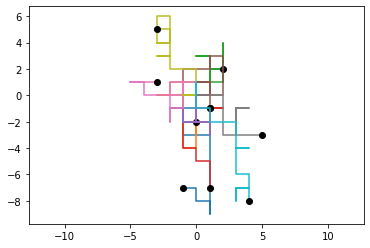

In [733]:
M = 10
for m in range(M):
    walk = walker2D(N=20)
    plt.plot(walk['xAccum'], walk['yAccum'])
    plt.plot(walk['x'], walk['y'], 'ko')

plt.axis('equal')

In [734]:
def generateWalkers(M=10, N=20):

    rows = []
    for t in range(M):
        row = walker2D(N=N)
        rows.append(row)
        

    df = pd.DataFrame(rows)
    
    return df

In [735]:
df = generateWalkers(M=20)

In [736]:
df

,x,y,xAccum,yAccum
0,1.0,5.0,"[0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, ...","[0.0, -1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0,..."
1,1.0,-1.0,"[0.0, 0.0, 0.0, 0.0, -1.0, -1.0, -1.0, 0.0, 0....","[0.0, 1.0, 0.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0.0, ..."
2,-3.0,1.0,"[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, -1.0, -1.0, 0.0...","[0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, ..."
3,-2.0,-2.0,"[0.0, 0.0, -1.0, -2.0, -3.0, -2.0, -1.0, 0.0, ...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, ..."
4,0.0,2.0,"[0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0,...","[0.0, -1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
5,-3.0,3.0,"[0.0, -1.0, -1.0, -2.0, -1.0, 0.0, 1.0, 1.0, 1...","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, ..."
6,3.0,1.0,"[0.0, 0.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...","[0.0, 1.0, 1.0, 1.0, 0.0, -1.0, 0.0, -1.0, 0.0..."
7,-6.0,2.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, -2.0...","[0.0, 1.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 2.0, ..."
8,-2.0,-2.0,"[0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, ...","[0.0, 0.0, -1.0, -2.0, -1.0, -1.0, -2.0, -3.0,..."
9,3.0,7.0,"[0.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 2.0, ...","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, ..."


In [737]:
def plot_xy(df):
    for walk in df.itertuples():
        plt.plot(walk.xAccum, walk.yAccum, 'k-', linewidth=0.1)
        plt.plot(walk.x, walk.y, 'k.')
        
    plt.axis('equal')

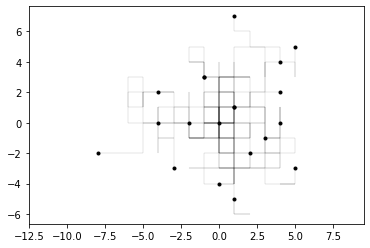

In [483]:
plot_xy(df)

We are interested in calculate statistics over all of the walkers.

$$ \left<x\right>, \left<y\right>, \Delta x^2, \Delta y^2 $$

and

$$R^2 = \left<x^2\right> - \left<x\right>^2 + \left<y^2\right> - \left<y\right>^2 = \Delta x^2 + \Delta y^2 $$

In [738]:
df.x.mean()

0.1

In [739]:
(df.x**2).mean()

12.6

In [740]:
def compute_R(df):
    Δx2 = (df.x**2).mean() -  df.x.mean()**2
    Δy2 = (df.y**2).mean() - df.y.mean()**2
    R2 = Δx2 + Δy2
    R = np.sqrt(R2)
    
    return R

In [742]:
R = compute_R(df)
R

4.469899327725401

(-10.75, 5.75, -3.5, 7.5)

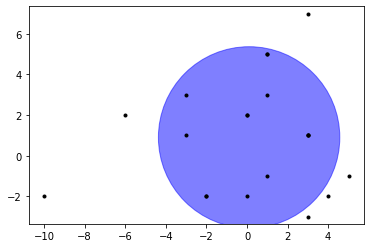

In [743]:
fig, ax = plt.subplots()

plt.plot(df.x, df.y, 'k.')

x_avg = df.x.mean()
y_avg = df.y.mean()
circle1 = plt.Circle((x_avg, y_avg), R, color='b', alpha=0.5)
ax.add_artist(circle1)

plt.axis('equal')

In [750]:
df = generateWalkers(N=500, M=1000)
R = compute_R(df)
R

22.47719591052229

(-50.7, 52.7, -52.75, 51.75)

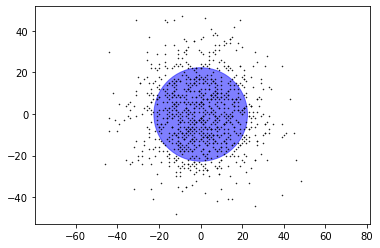

In [751]:
fig, ax = plt.subplots()

plt.plot(df.x, df.y, 'k.', markersize=1)

x_avg = df.x.mean()

y_avg = df.y.mean()
circle1 = plt.Circle((x_avg, y_avg), R, color='b', alpha=0.5)
ax.add_artist(circle1)

plt.axis('equal')

We are interested in how $R$ depends on $N$

In [752]:
rows = []
for N in [8, 16, 32, 64, 128, 256]:
    df = generateWalkers(N=N, M=2000)
    
    R = compute_R(df)
    
    row = {'N':N, 'R': R}
    rows.append(row)
df = pd.DataFrame(rows)

df

,N,R
0,8,2.850220
1,16,3.962102
2,32,5.466035
3,64,7.920215
4,128,11.448234
5,256,15.956781


Assume that $R = \sqrt{R^2}$ has the asymptotic $N$ dependence:

$$R \sim N^\nu$$

and we want to estimate $\nu$

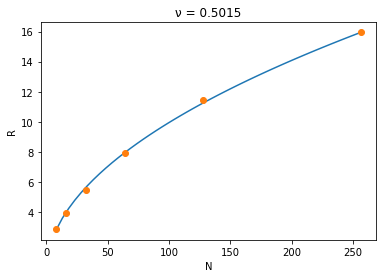

In [753]:
def estimate_ν(df):
    ν, C = np.polyfit(np.log(df.N), np.log(df.R), 1)

    N = np.linspace(df.N.min(), df.N.max(), 50)
    R_fit = N**ν*np.exp(C)

    plt.plot(N, R_fit, '-')
    plt.plot(df.N, df.R, 'o')

    plt.xlabel('N')
    plt.ylabel('R')
    plt.title(f'ν = {ν:.4f}')

estimate_ν(df)

## Self-avoiding walk

Problem 7.28

In [754]:
def SAW(N = 100, # number of steps
        x0 = 0, # initial position
        y0 = 0, 
        a = 1, # step size
        ):
    
    xAccum = np.zeros(N+1)*np.nan
    yAccum = np.zeros(N+1)*np.nan
    
    x = x0
    y = y0
    xAccum[0] = x
    yAccum[0] = y
    
    for n in range(N):

        # pick a random direction
        r = np.random.rand()
        if r < 0.25:
            x += a
        elif r < 0.50:
            x -= a
        elif r < 0.75:
            y += a
        else:
            y -= a

        # check if that the move would be invalid
        valid = True
        for i in range(n):
            if x==xAccum[i] and y==yAccum[i]:
                valid = False

        if not valid:
            break
        
        xAccum[n+1] = x
        yAccum[n+1] = y
        
    return {'valid': valid,
            'x': xAccum[-1],
            'y': yAccum[-1],
            'xAccum': xAccum,
            'yAccum': yAccum,
            }

In [762]:
walk = SAW(N=5)
walk

{'valid': False,
 'x': nan,
 'y': nan,
 'xAccum': array([ 0.,  0.,  0.,  1., nan, nan]),
 'yAccum': array([ 0.,  1.,  2.,  2., nan, nan])}

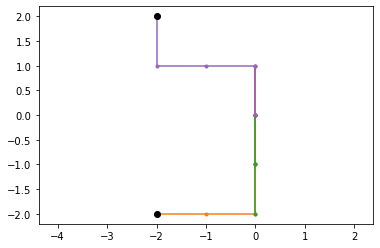

In [763]:
M = 5
for m in range(M):
    walk = SAW(N=4)
    plt.plot(walk['xAccum'], walk['yAccum'], '.-')
    plt.plot(walk['x'], walk['y'], 'ko')

plt.axis('equal')
plt.show()

In [764]:
def generateSAW(M=100, N=10):

    rows = []
    for t in range(M):
        row = SAW(N=N)
        rows.append(row)

    df = pd.DataFrame(rows)
    
    return df

In [765]:
df = generateSAW(M=10, N=5)
df

,valid,x,y,xAccum,yAccum
0,False,NaN,NaN,"[0.0, 0.0, 0.0, 0.0, nan, nan]","[0.0, 1.0, 2.0, 3.0, nan, nan]"
1,False,NaN,NaN,"[0.0, 0.0, -1.0, -2.0, nan, nan]","[0.0, 1.0, 1.0, 1.0, nan, nan]"
2,True,-2.0,-3.0,"[0.0, -1.0, -2.0, -2.0, -2.0, -2.0]","[0.0, 0.0, 0.0, -1.0, -2.0, -3.0]"
3,False,NaN,NaN,"[0.0, 0.0, nan, nan, nan, nan]","[0.0, 1.0, nan, nan, nan, nan]"
4,False,NaN,NaN,"[0.0, 1.0, 1.0, nan, nan, nan]","[0.0, 0.0, 1.0, nan, nan, nan]"
5,False,NaN,NaN,"[0.0, 0.0, 1.0, nan, nan, nan]","[0.0, 1.0, 1.0, nan, nan, nan]"
6,False,NaN,NaN,"[0.0, 1.0, nan, nan, nan, nan]","[0.0, 0.0, nan, nan, nan, nan]"
7,True,1.0,-2.0,"[0.0, 1.0, 2.0, 2.0, 1.0, 1.0]","[0.0, 0.0, 0.0, -1.0, -1.0, -2.0]"
8,True,-2.0,-1.0,"[0.0, 0.0, 0.0, -1.0, -2.0, -2.0]","[0.0, -1.0, -2.0, -2.0, -2.0, -1.0]"
9,False,NaN,NaN,"[0.0, 1.0, 1.0, 2.0, nan, nan]","[0.0, 0.0, -1.0, -1.0, nan, nan]"


In [768]:
df[df.valid]

,valid,x,y,xAccum,yAccum
2,True,-2.0,-3.0,"[0.0, -1.0, -2.0, -2.0, -2.0, -2.0]","[0.0, 0.0, 0.0, -1.0, -2.0, -3.0]"
7,True,1.0,-2.0,"[0.0, 1.0, 2.0, 2.0, 1.0, 1.0]","[0.0, 0.0, 0.0, -1.0, -1.0, -2.0]"
8,True,-2.0,-1.0,"[0.0, 0.0, 0.0, -1.0, -2.0, -2.0]","[0.0, -1.0, -2.0, -2.0, -2.0, -1.0]"


What is fraction $f(N)$ of successful attempts at constructing a chain of length $N$?

In [770]:
M = 10000
rows = []
for N in range(1, 20):

    df = generateSAW(M=M, N=N)
    
    N_valid = len(df[df.valid])
    row = {'N': N,
           'N_valid' : N_valid,
           'f': N_valid / M}
    
    rows.append(row)
df = pd.DataFrame(rows)
df

,N,N_valid,f
0,1,10000,1.0000
1,2,7451,0.7451
2,3,5607,0.5607
3,4,3837,0.3837
4,5,2804,0.2804
5,6,1870,0.1870
6,7,1279,0.1279
7,8,918,0.0918
8,9,581,0.0581
9,10,432,0.0432


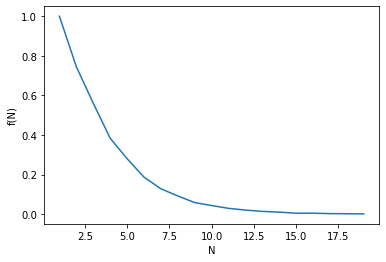

In [771]:
plt.plot(df.N, df.f)
plt.xlabel('N')
plt.ylabel('f(N)')
plt.show()

In [772]:
M = 10000
rows = []
for N in [2, 4, 8, 16]:

    df = generateSAW(M=M, N=N)
    R = compute_R(df)

    row = {'N': N,
           'R': R}
    
    rows.append(row)
df = pd.DataFrame(rows)
df

,N,R
0,2,1.626659
1,4,2.648340
2,8,4.318395
3,16,6.824697


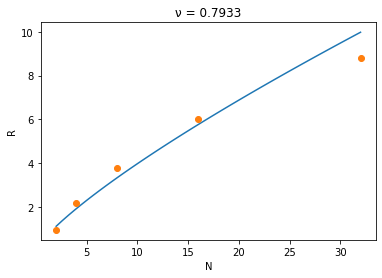

In [727]:
estimate_ν(df)

## Enrichment

In [773]:
def SAW(N = 100, # number of steps
        x0 = 0, # initial position
        y0 = 0, 
        ):
    
    L = np.zeros((2*N+1, 2*N+1), np.bool)
    
    x = x0
    y = y0
    
    L[x, y] = True
    w = 1
    # assume first move is "North"
    y += 1
    L[x, y] = True
    
    valid = True
    for n in range(1, N):

        allMoves = [ (1,0), (-1, 0), (0, 1), (0, -1)]
        validMoves = []
        for move in allMoves:
            dx, dy = move
            if not L[x+dx, y+dy]:
                validMoves.append(move)
        
        m = len(validMoves)
        
        if m == 0:
            # there are no possible valid moves
            valid = False
            w = 0
            break
        elif m == 1:
            # only one possible choice
            w = 1/3 * w
            move = validMoves[0]
        elif m == 2:
            # two possible choices
            w = 2/3 * w
            r = np.random.rand()
            if r < 1/2:
                move = validMoves[0]
            else:
                move = validMoves[1]
        else: # m==3
            # three possible choices
            w = w
            r = np.random.rand()
            if r < 1/3:
                move = validMoves[0]
            elif r < 2/3:
                move = validMoves[1]
            else:
                move = validMoves[2]         

        dx, dy = move
        x += dx
        y += dy
        
        L[x, y] = True
        
    return {'valid': valid,
            'w': w,
            'x': x,
            'y': y
            }

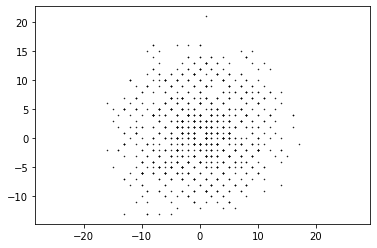

In [774]:
M = 1000
for m in range(M):
    walk = SAW(N=32)
    plt.plot(walk['x'], walk['y'], 'k.', markersize=1)

plt.axis('equal')
plt.show()

In [775]:
df = generateSAW(M=100, N=4)
df['R2'] = df.x**2 + df.y**2

#df[df.valid]
(df.w*df.R2).sum() / df.w.sum()

7.1843971631205665

In [776]:
df.w.sum()

94.0

In [779]:
M = 10000
rows = []
for N in [8, 16, 32, 64, 128]:

    df = generateSAW(M=M, N=N)
    df = df[df.valid]
    df['R2'] = df.x**2 + df.y**2
    R2 = (df.w*df.R2).sum() / df.w.sum()
    R = np.sqrt(R2)
    
    N_valid = len(df[df.valid])
    row = {'N': N,
           'N_valid' : N_valid,
           'f': N_valid / M,
           'R': R
            }
    
    rows.append(row)
df = pd.DataFrame(rows)
df

,N,N_valid,f,R
0,8,9968,0.9968,4.362571
1,16,9480,0.9480,7.151708
2,32,7844,0.7844,12.028782
3,64,4528,0.4528,19.460352
4,128,1267,0.1267,33.901589


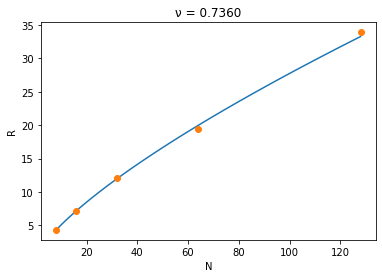

In [780]:
estimate_ν(df)